<a href="https://colab.research.google.com/github/anaghaasunil2004/CNN-AppleLeaf-Disease-Detection/blob/main/CNN_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
from PIL import Image
from skimage.feature import hog
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
import seaborn as sns

In [ ]:
train=pd.read_csv("/content/drive/MyDrive/plant-pathology-2020-fgvc7/train.csv")
test=pd.read_csv("/content/drive/MyDrive/plant-pathology-2020-fgvc7/test.csv")

In [ ]:
base_path='/content/drive/MyDrive/plant-pathology-2020-fgvc7/images'
def generate_image_path(image_id):
    return f"{base_path}{image_id}.jpg"

# Apply the function to create the 'img' column
train['img'] = train['image_id'].apply(generate_image_path)
test['img'] = test['image_id'].apply(generate_image_path)

In [ ]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab,img
0,Train_0,0,0,0,1,/content/drive/MyDrive/plant-pathology-2020-fg...
1,Train_1,0,1,0,0,/content/drive/MyDrive/plant-pathology-2020-fg...
2,Train_2,1,0,0,0,/content/drive/MyDrive/plant-pathology-2020-fg...
3,Train_3,0,0,1,0,/content/drive/MyDrive/plant-pathology-2020-fg...
4,Train_4,1,0,0,0,/content/drive/MyDrive/plant-pathology-2020-fg...


In [ ]:
test.head()

,image_id,img
0,Test_0,/content/drive/MyDrive/plant-pathology-2020-fg...
1,Test_1,/content/drive/MyDrive/plant-pathology-2020-fg...
2,Test_2,/content/drive/MyDrive/plant-pathology-2020-fg...
3,Test_3,/content/drive/MyDrive/plant-pathology-2020-fg...
4,Test_4,/content/drive/MyDrive/plant-pathology-2020-fg...


In [ ]:
sample=pd.read_csv("/content/drive/MyDrive/plant-pathology-2020-fgvc7/sample_submission.csv")
sample

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.25,0.25,0.25,0.25
1,Test_1,0.25,0.25,0.25,0.25
2,Test_2,0.25,0.25,0.25,0.25
3,Test_3,0.25,0.25,0.25,0.25
4,Test_4,0.25,0.25,0.25,0.25
...,...,...,...,...,...
1816,Test_1816,0.25,0.25,0.25,0.25
1817,Test_1817,0.25,0.25,0.25,0.25
1818,Test_1818,0.25,0.25,0.25,0.25
1819,Test_1819,0.25,0.25,0.25,0.25


In [ ]:
img = cv2.imread(train['img'].iloc[1])

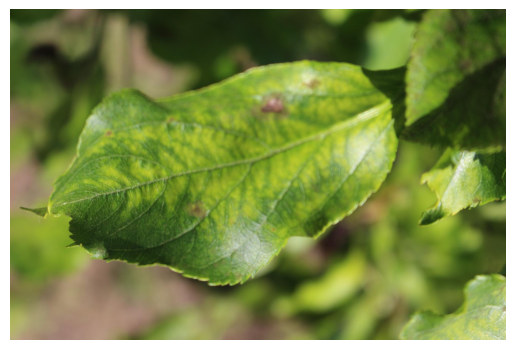

In [ ]:
import matplotlib.pyplot as plt
import os
import shutil
import cv2

# Assuming you have already defined 'base_path' and loaded 'train' DataFrame

def generate_image_path(image_id):
    return os.path.join(base_path, f"{image_id}.jpg")

# Reapply the function to create the 'img' column with corrected paths
train['img'] = train['image_id'].apply(generate_image_path)

img_path = train['img'].iloc[0]  # Get the image path

# Create a temporary directory to store the copied image
temp_dir = "/content/temp_images"
os.makedirs(temp_dir, exist_ok=True)

# Copy the image to the temporary directory
temp_img_path = os.path.join(temp_dir, os.path.basename(img_path))
shutil.copy(img_path, temp_img_path)

# Load the image from the temporary directory using cv2.imread
img = cv2.imread(temp_img_path)

# Check if the image was loaded successfully
if img is not None:
    # Convert BGR to RGB (if needed)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Remove the temporary image file
    os.remove(temp_img_path)
else:
    print(f"Error: Could not load image from path: {temp_img_path}")

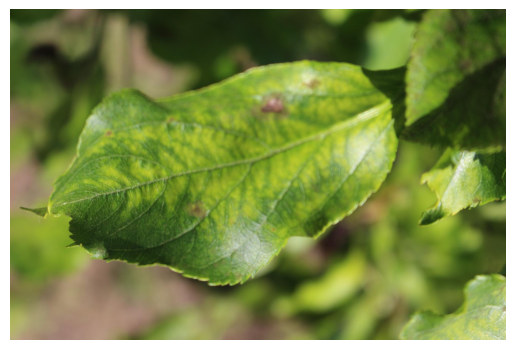

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
IMAGE_SIZE = 224
x=[]
for i in train['img']:
    img = cv2.imread(i)

    # Convert BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image
    resized_img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
    x.append(resized_img)

In [ ]:
x = np.array(x)

# Prepare the target labels, repeating the labels for each augmented version
y = train[['healthy', 'multiple_diseases', 'rust', 'scab']].values

In [ ]:
len(x)

1821

In [ ]:
y.shape

(1821, 4)

In [ ]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
x_train.shape

(1456, 224, 224, 3)

In [ ]:
from keras import layers
from keras.models import Sequential
from keras.layers import Input, Conv2D

# Correct way
model = Sequential([
    Input(shape=(224, 224, 3)),  # Use Input layer to specify the shape
    Conv2D(32, (3, 3), activation='relu')
])


In [ ]:
from keras.layers import Input, Conv2D
from keras.models import Model

input_layer = Input(shape=(224, 224, 3))
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
model = Model(inputs=input_layer, outputs=x)


In [ ]:
model = models.Sequential([
    layers.Rescaling(1./255.,input_shape=(224,224,3)),
    layers.Conv2D(8,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    layers.Conv2D(16,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(4,activation='softmax'),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    keras.Input(shape=(224, 224, 3)),  # Define input shape here
    layers.Rescaling(1./255.),  # Remove input_shape from Rescaling
    layers.Conv2D(8, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.2),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.2),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax'),
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
epochs = 25

model.fit(
    x_train,
    y_train,
    epochs=epochs
)

Epoch 1/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.3183 - loss: 1.4623
Epoch 2/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4296 - loss: 1.1941
Epoch 3/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4368 - loss: 1.1858
Epoch 4/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4782 - loss: 1.1265
Epoch 5/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5242 - loss: 1.0777
Epoch 6/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5627 - loss: 1.0433
Epoch 7/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6274 - loss: 0.9288
Epoch 8/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7156 - loss: 0.7739
Epoch 9/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7480 - loss: 0.6308
Epoch 10/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7753 - loss: 0.5473
Epoch 11/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8440 - loss: 0.4469
Epoch 12/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy

In [ ]:
import cv2
import os


base_path='/content/drive/MyDrive/plant-pathology-2020-fgvc7/images/' # Add '/' here to create the full path

def generate_image_path(image_id):
    return os.path.join(base_path, f"{image_id}.jpg") # Use os.path.join to create the full path

# Reapply the function to create the 'img' column with corrected paths
train['img'] = train['image_id'].apply(generate_image_path)
test['img'] = test['image_id'].apply(generate_image_path)

img_path = test['img'].iloc[2]

# Check if the image exists
if os.path.exists(img_path):
    img1 = cv2.imread(img_path)

    # Check if the image was loaded successfully
    if img1 is not None:
        # Convert BGR to RGB
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

        # Resize the image
        resized_img1 = cv2.resize(img1, (IMAGE_SIZE, IMAGE_SIZE))
    else:
        print(f"Error: Could not load image from path: {img_path}")
else:
    print(f"Error: Image file does not exist at path: {img_path}")

In [ ]:
resized_img1.shape

(224, 224, 3)

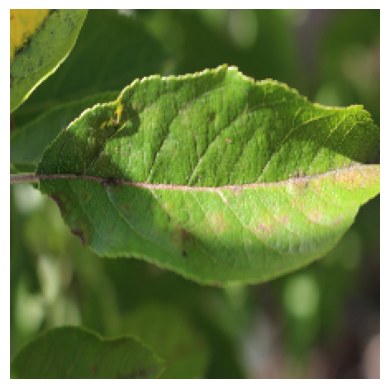

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(resized_img)
plt.axis('off')
plt.show()

In [ ]:
resized_img1 = np.expand_dims(resized_img1, axis=0)  # Shape becomes (1, 224, 224, 3)

# Predict
predictions = model.predict(resized_img1)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step
[[5.5575550e-01 7.7799219e-04 4.3610120e-04 4.4303042e-01]]


In [ ]:
testing=[]
for i in test['img']:
    img1 = cv2.imread(i)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    resized_img1 = cv2.resize(img1, (IMAGE_SIZE,IMAGE_SIZE))
    resized_img1 = np.expand_dims(resized_img1, axis=0)
    testing.append(model.predict(resized_img1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

In [ ]:
predictions_df = []
for i in testing:
    for j in i:
        predictions_df.append(j)

In [ ]:
p1=np.array(predictions_df)

In [ ]:
q=pd.DataFrame(np.round(p1,2))
submission_df=pd.concat([test['image_id'],q],axis=1)

In [ ]:
label_encode = {0:"healthy",1:"multiple_diseases",2:"rust",3:"scab"}

In [ ]:
submission_df

,image_id,0,1,2,3
0,Test_0,0.78,0.13,0.08,0.02
1,Test_1,0.04,0.00,0.96,0.00
2,Test_2,0.56,0.00,0.00,0.44
3,Test_3,0.00,0.00,0.99,0.01
4,Test_4,0.64,0.00,0.29,0.07
...,...,...,...,...,...
1816,Test_1816,0.59,0.26,0.11,0.03
1817,Test_1817,0.00,0.00,0.05,0.95
1818,Test_1818,0.72,0.00,0.28,0.00
1819,Test_1819,0.88,0.00,0.07,0.05


In [ ]:
submission_df.rename(columns={k:label_encode[k] for k in range(0,4)}).to_csv("submission.csv",index=False)

In [ ]:
testing = []
for image in x_test:  # Predict on x_test
    image = np.expand_dims(image, axis=0)
    testing.append(model.predict(image))

predicted_labels = []
for prediction in testing:
    predicted_class = np.argmax(prediction)
    predicted_labels.append(predicted_class)

predicted_labels = np.array(predicted_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

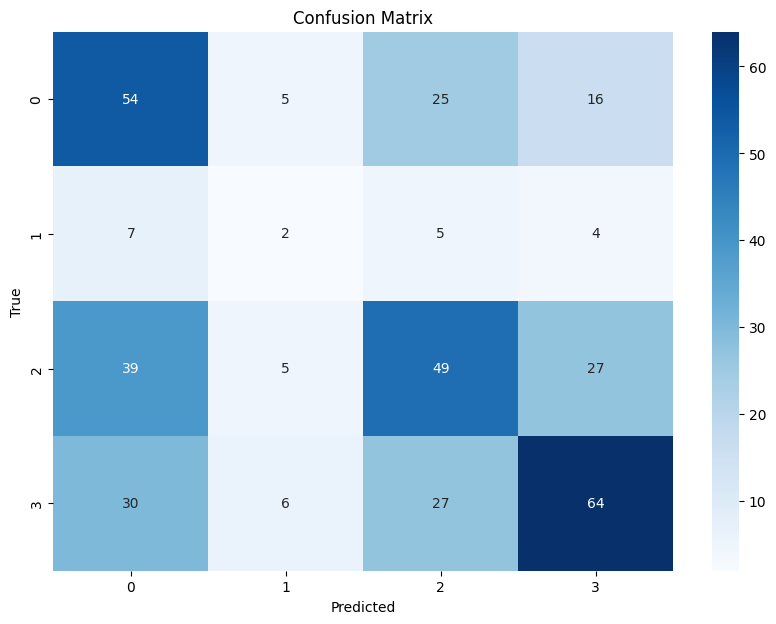

In [ ]:
cm = confusion_matrix(y_test.argmax(axis=1), predicted_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.4630137085914612


In [ ]:
from tensorflow.keras.metrics import Precision
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', Precision()])
loss, accuracy, precision = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Precision: {precision}")

Test Precision: 0.47109827399253845


In [ ]:
from sklearn.metrics import f1_score

# Assuming you have already predicted on x_test and stored the predictions in 'predicted_labels'
# (as in the previous response for confusion matrix)

f1 = f1_score(y_test.argmax(axis=1), predicted_labels, average='weighted')

print(f"F1 Score: {f1}")

F1 Score: 0.46382038624006106


In [ ]:
from sklearn.metrics import recall_score

# Assuming you have already predicted on x_test and stored the predictions in 'predicted_labels'
# (as in the previous responses for confusion matrix and F1 score)

recall = recall_score(y_test.argmax(axis=1), predicted_labels, average='weighted')

print(f"Recall: {recall}")

Recall: 0.46301369863013697


In [ ]:
from sklearn.metrics import accuracy_score

# Assuming you have already predicted on x_test and stored the predictions in 'predicted_labels'
# (as in the previous responses for confusion matrix, F1 score, and recall)

accuracy = accuracy_score(y_test.argmax(axis=1), predicted_labels)

print(f"Accuracy: {accuracy}")

Accuracy: 0.46301369863013697


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming you have x_test and y_test ready

# Make predictions
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Get true labels (assuming y_test is one-hot encoded)
y_true_labels = np.argmax(y_test, axis=1)

# Print classification report
print(classification_report(y_true_labels, y_pred_labels))

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
              precision    recall  f1-score   support

           0       0.42      0.54      0.47       100
           1       0.11      0.11      0.11        18
           2       0.46      0.41      0.43       120
           3       0.58      0.50      0.54       127

    accuracy                           0.46       365
   macro avg       0.39      0.39      0.39       365
weighted avg       0.47      0.46      0.46       365



In [ ]:
import cv2
import numpy as np

def predict_disease(image_path):
    """Predicts the disease based on the given image.

    Args:
        image_path: The path to the image file.

    Returns:
        A string representing the predicted disease.
    """
    IMAGE_SIZE = 224
    label_encode = {0: "healthy", 1: "multiple_diseases", 2: "rust", 3: "scab"}

    # Load and preprocess the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    img = np.expand_dims(img, axis=0)

    # Make the prediction
    prediction = model.predict(img)

    # Get the predicted class
    predicted_class_index = np.argmax(prediction)
    predicted_disease = label_encode[predicted_class_index]

    return predicted_disease

# Example usage
image_path = "/content/drive/MyDrive/plant-pathology-2020-fgvc7/images/Test_105.jpg" # Replace with the actual path to your image
predicted_disease = predict_disease(image_path)
print(f"Predicted Disease: {predicted_disease}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Disease: rust


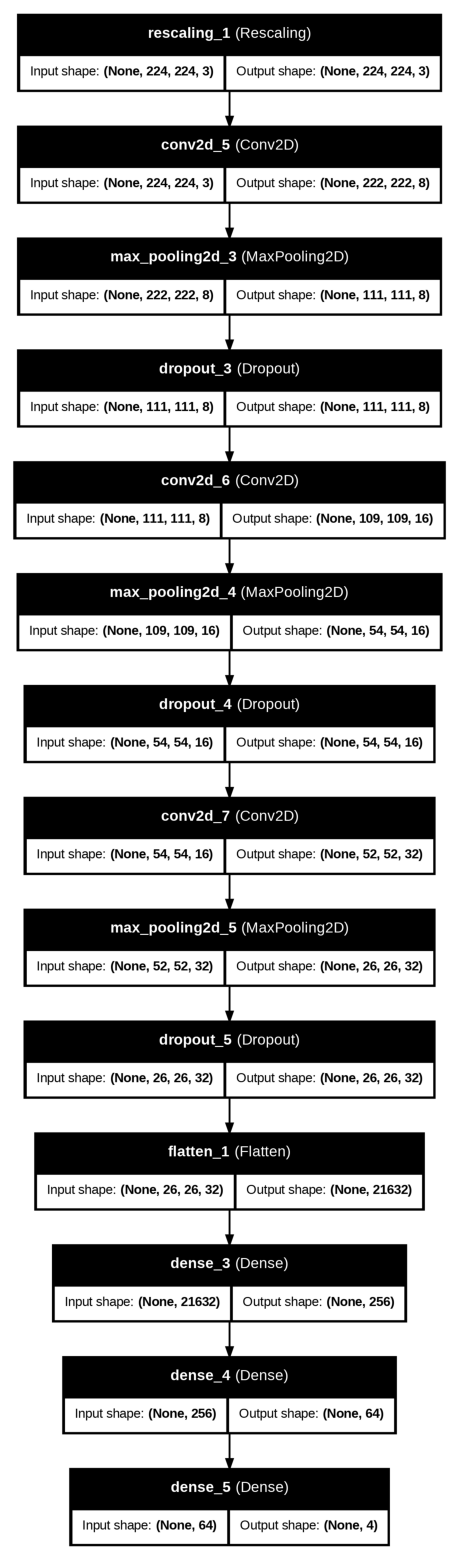

In [ ]:
!pip install pydot
!pip install graphviz

# Import necessary libraries
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Generate the plot
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Display the plot
img = mpimg.imread('model_plot.png')
plt.figure(figsize=(20, 20)) # Adjust figure size as needed
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
!pip install visualkeras

import visualkeras
from tensorflow.keras import layers

# Assuming 'model' is your defined Keras model

# Create the visualization
visualkeras.layered_view(model, legend=True, to_file='model_visualization.png').show() # Display the visualization

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 20.8 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


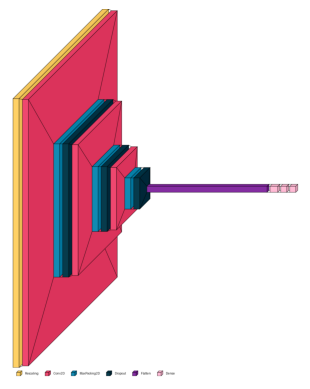

In [ ]:
!pip install visualkeras

import visualkeras
from tensorflow.keras import layers
import matplotlib.pyplot as plt # Import pyplot

# Assuming 'model' is your defined Keras model

# Create the visualization
visualkeras.layered_view(model, legend=True, to_file='model_visualization.png')

# Load and display the visualization
img = plt.imread('model_visualization.png') # Load the image
plt.imshow(img) # Display the image
plt.axis('off') # Turn off axis labels
plt.show() # Show the plot